<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
from scipy.stats import pearsonr

Загрузить датасет по url:


In [3]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url = "http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df = pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


**Проверка на выбросы**

In [6]:
df.isna().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

**Удаляем NaN**

In [7]:
df_2 = df.dropna()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         140 non-null    object 
 1   Ladder                   140 non-null    int64  
 2   SD of Ladder             140 non-null    int64  
 3   Positive affect          140 non-null    float64
 4   Negative affect          140 non-null    float64
 5   Social support           140 non-null    float64
 6   Freedom                  140 non-null    float64
 7   Corruption               140 non-null    float64
 8   Generosity               140 non-null    float64
 9   Log of GDP
per capita    140 non-null    float64
 10  Healthy life
expectancy  140 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
df_2.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [9]:
freedom = df_2['Freedom']
positive_affect = df_2['Positive affect']

In [10]:
freedom.isnull().sum()

0

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

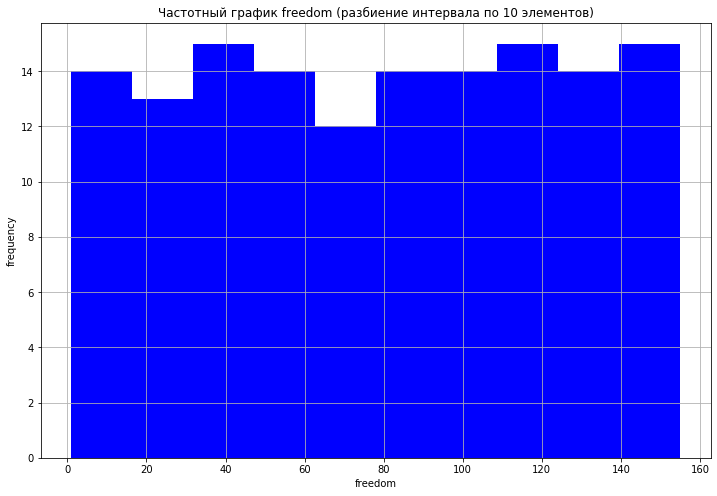

In [13]:
patches = plt.hist(freedom, 10, color='b')
plt.xlabel('freedom')
plt.ylabel('frequency')
plt.title('Частотный график freedom (разбиение интервала по 10 элементов)')
plt.grid(True)

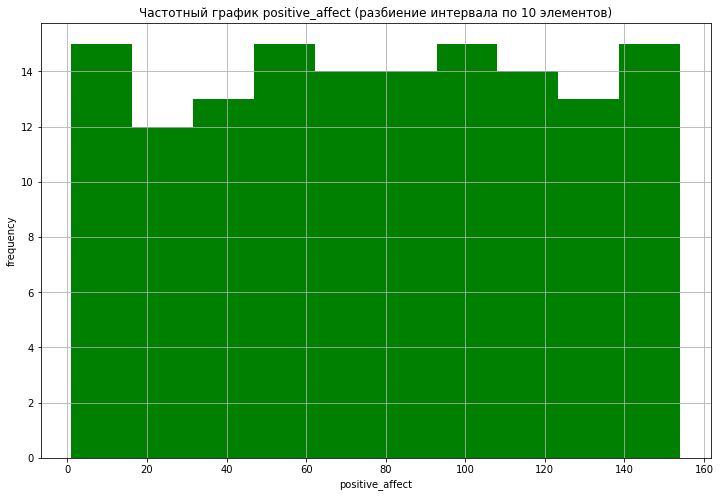

In [14]:
patches = plt.hist(positive_affect, 10, color='g')
plt.xlabel('positive_affect')
plt.ylabel('frequency')
plt.title('Частотный график positive_affect (разбиение интервала по 10 элементов)')
plt.grid(True)

**И в первом и втором случае распределение равномерное.**

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

**Мода**

In [154]:
print('Значение моды: ', statistics.mode(freedom))

StatisticsError: no unique mode; found 140 equally common values

**Медиана**

In [155]:
print('Медиана: ', statistics.median(freedom))

Медиана:  79.5


**Математическое ожидание**

In [157]:
print('Мат ожидание: ', statistics.mean(freedom))

Мат ожидание:  78.82857142857142


**Стандартное отклонение**

In [158]:
print('Стандартное отклонение', statistics.pstdev(freedom))

Стандартное отклонение 44.9475794449399


**Дисперсия**

In [159]:
print('Дисперсия', statistics.pvariance(freedom))

Дисперсия 2020.2848979591836


**Минимум**

In [160]:
max(freedom)

155.0

**Максимум**

In [161]:
min(freedom)

1.0

Почему нельзя найти моду?

**Потому что в выборке все уникальные значения, они встречаются по разу**

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

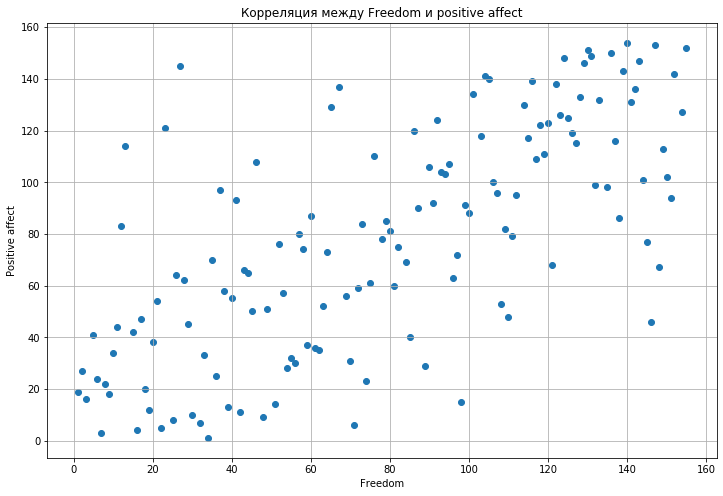

In [11]:
plt.scatter(freedom, positive_affect)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Корреляция между Freedom и positive affect')
plt.grid(True)
plt.show()

In [152]:
corr, p_value = pearsonr(freedom, positive_affect)
print(corr)
print(p_value)

0.6965670458090685
1.2239087557813634e-21


**В данном примере коэффициент Пирсона показывает, что между Freedom и positive affect есть достаточно сильная прямая зависимость. При увеличении одной переменной ростет и вторая.**

Нормализовать данные колонки Freedom (централизация + масштабирование)

**Централизация**

In [145]:
freedom_2 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_2))

6.496390726949487e-15


**Масштабирование**

In [146]:
min(freedom_2)

-77.82857142857142

In [147]:
max(freedom_2)

76.17142857142858

In [149]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

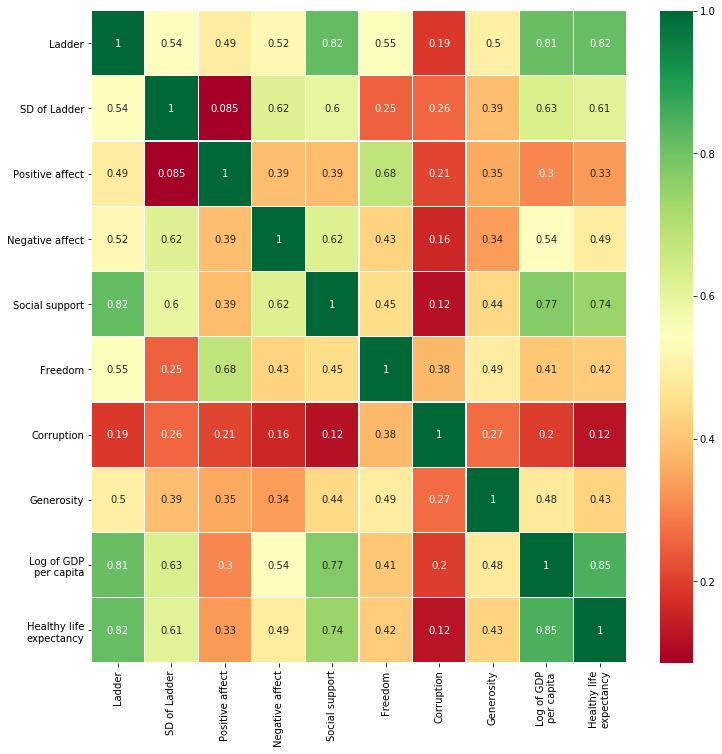

In [24]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [17]:
df_3 = pd.read_csv('avocado.csv')
df_3[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

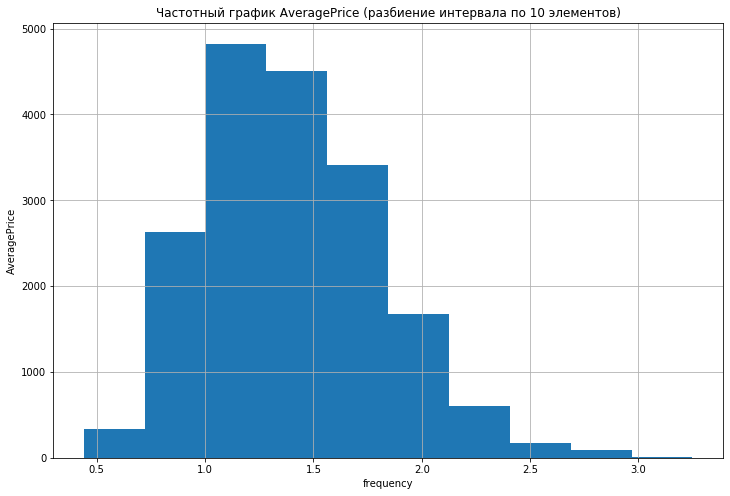

In [18]:
patches = plt.hist(df_3['AveragePrice'], 10)
plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)

**На частотном графике отображено нормальное распределение**

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [29]:
col_4046 = df_3['4046']
col_4225 = df_3['4225']
col_4770 = df_3['4770']
average_price = df_3['AveragePrice']

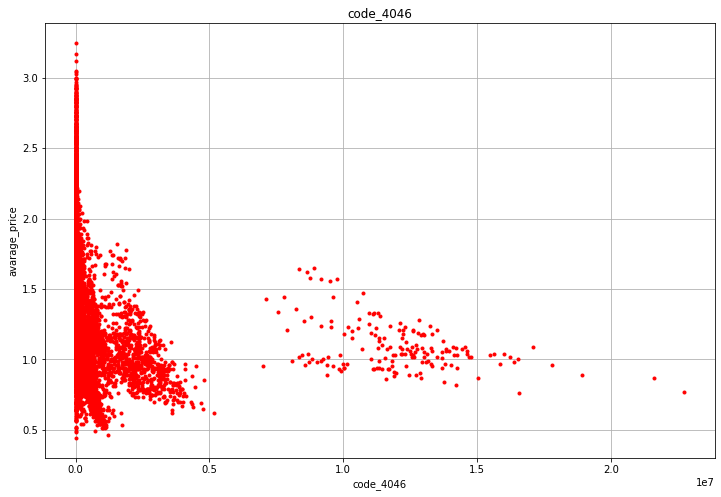

In [30]:
plt.plot(col_4046, average_price, 'r.')
plt.xlabel('code_4046')
plt.ylabel('avarage_price')
plt.title('code_4046')
plt.grid(True)
plt.show()

In [31]:
corr, p_value = pearsonr(col_4046, average_price)
print(corr)

-0.2083170484878848


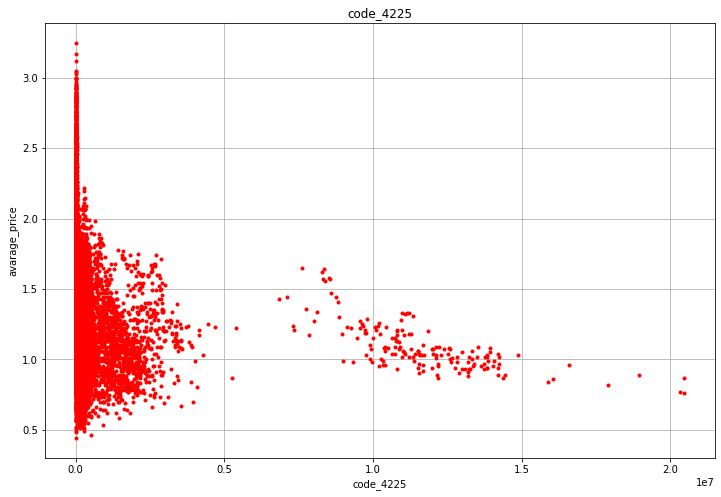

In [32]:
plt.plot(col_4225, average_price, 'r.')
plt.xlabel('code_4225')
plt.ylabel('avarage_price')
plt.title('code_4225')
plt.grid(True)
plt.show()

In [33]:
corr, p_value = pearsonr(col_4225, average_price)
print(corr)

-0.17292777250933541


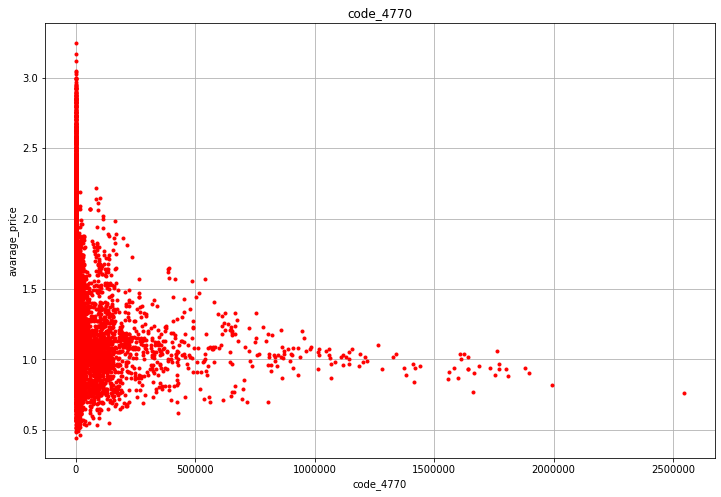

In [34]:
plt.plot(col_4770, average_price, 'r.')
plt.xlabel('code_4770')
plt.ylabel('avarage_price')
plt.title('code_4770')
plt.grid(True)
plt.show()

In [35]:
corr, p_value = pearsonr(col_4770, average_price)
print(corr)

-0.1794459839797562


**В каждом из трех случаев присутствует обратная корреляция. В данных примерах она показыват, что чем выше цена на авакадо (вне зависимости от сорта), тем хуже они продаются.**